#### Load imports

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### load data

In [106]:
with open('data/weather.csv','r') as file:
    dataset = pd.read_csv(file)
dataset['MaxTemp']

/home/gigz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0         25.555556
1         28.888889
2         26.111111
3         26.666667
4         26.666667
            ...    
119035    28.333333
119036    29.444444
119037    28.333333
119038    28.333333
119039    29.444444
Name: MaxTemp, Length: 119040, dtype: float64

#### Define X and Y labels



In [107]:
x = dataset['MinTemp'].values.reshape(-1, 1)
y = dataset['MaxTemp'].values.reshape(-1, 1)

#### Plot

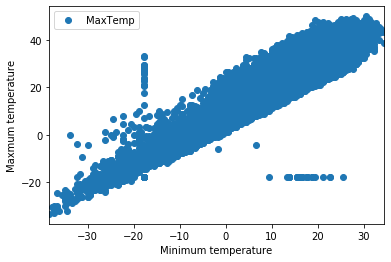

In [108]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o' )
plt.xlabel('Minimum temperature')
plt.ylabel('Maxmum temperature');

#### Split training and testing data

In [109]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)
X_test.size

23808

#### Training the model

In [110]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### view the intercept and coefficients

In [111]:
intercept_ = regr.intercept_
coef_ = regr.coef_

In [112]:
intercept_

array([10.66185201])

In [113]:
coef_

array([[0.92033997]])

#### Evaluate our model

In [114]:
max_temp_predict = regr.predict(X_test)
max_temp_predict

array([[33.67035117],
       [30.0912513 ],
       [26.51215143],
       ...,
       [32.64775121],
       [30.60255128],
       [31.62515124]])

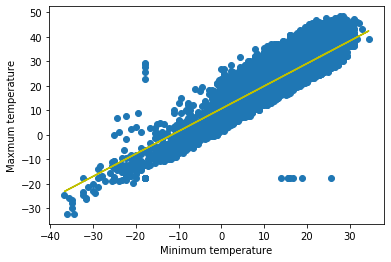

In [115]:
plt.scatter(X_test,y_test)
plt.plot(X_test, max_temp_predict, 'y', label='Linear regression (Scikit-learn GLM)')
plt.xlabel('Minimum temperature')
plt.ylabel('Maxmum temperature');

#### Comparing the actual values and the predicted values

In [116]:
max_temp_evaluation = pd.DataFrame({'ActualValues':y_test.flatten(), 'PredictedValues':max_temp_predict.flatten()})
max_temp_evaluation.head()

,ActualValues,PredictedValues
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852


#### Visualize comparison using bar graph

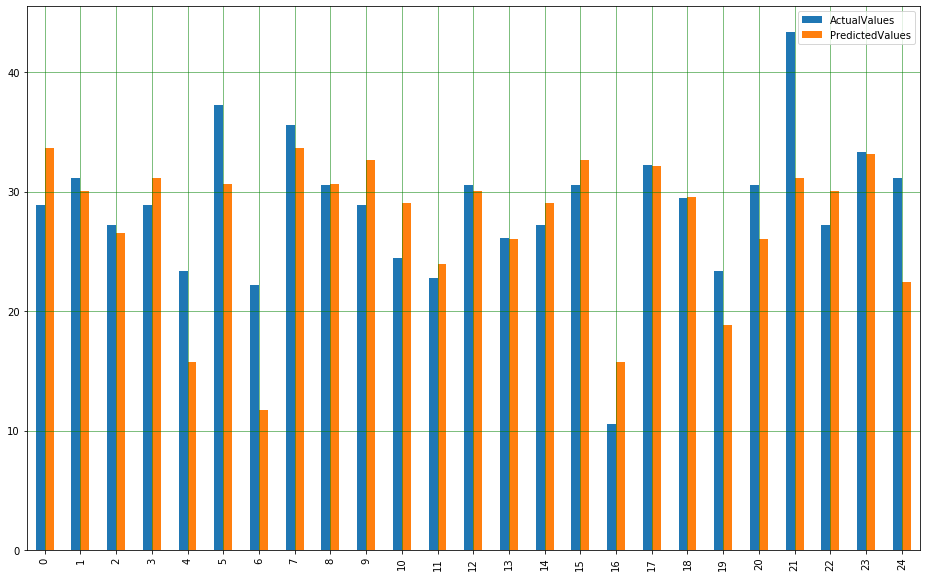

In [117]:
## pick the first 25 set
sample_dataset = max_temp_evaluation.head(25)
sample_dataset.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

#### Evaluating the performance of our model

In [118]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, max_temp_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, max_temp_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, max_temp_predict)))

Mean Absolute Error: 3.1993291783785285
Mean Squared Error: 17.631568097568444
Root Mean Squared Error: 4.198996082109204
